Text(0.5, 0.5, 'Y')

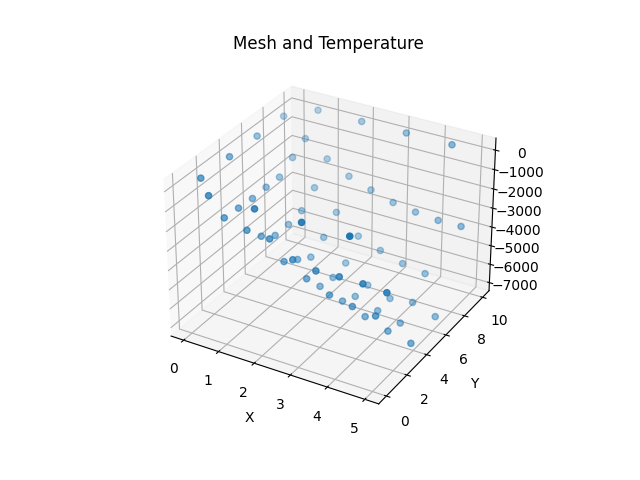

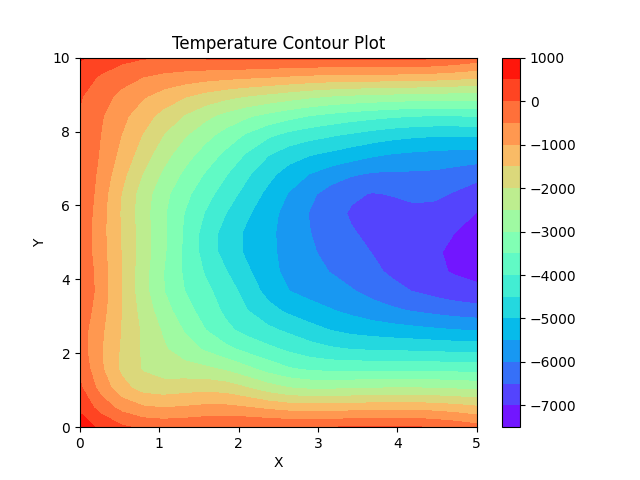

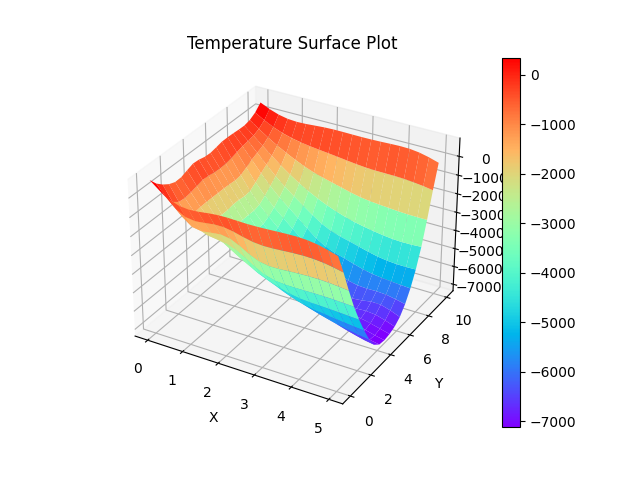

In [4]:
#STEADY HEAT TRANSFER POISSON PROBLEMS SOLVER, RECTANGULAR DOMAINS
#Install following widgets for correct function:
#pip install ipywidgets 
#pip install ipympl --user 
#jupyter nbextension enable --py --sys-prefix widgetsnbextension
#jupyter nbextension install --py --symlink --sys-prefix ipympl
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import scipy as smp
from scipy.integrate import quad
from scipy import interpolate
from scipy import random
from scipy import integrate


######## INPUTS #############################################################

Elements = 4              # INSERT NUMBER OF ELEMENTS
N = 2*Elements + 1
NINT = N*N - (4*N - 4)
x0 = 0                    # INSERT INITIAL COORD X OF WIDTH
x1 = 5                   # INSERT FINAL COORD X OF WIDTH
y0 = 0                    # INSERT INITIAL COORD Y OF WIDTH
y1 = 10                   # INSERT FINAL COORD Y OF WIDTH
BCT = np.zeros(4*Elements)
BCQ = np.zeros(4*Elements)
VBCT = np.zeros(4*Elements)
VBCQ = np.zeros(4*Elements)
#SIDES OF RETANGULAR PLATE
#------3------
#I           I
#I           I
#4           2
#I           I
#I           I
#------1------
# INSERT BOUNDARY CONDITIONS
BCType1 = 1       # BOUNDARY CONDITION TYPE ON SIDE 1, SET BCType1 = 1 For temperature, SET BCType1 = 0 For flux, 
BCType2 = 0
BCType3 = 1
BCType4 = 1

def VBCT1(x,y):
    return 0        #VBCT1 = 100x -> VALUE OF TEMPERATURE BOUNDARY CONDITION ON SIDE 1, FUNCTIONS OF X AND Y CAN BE USED   
def VBCQ1(x,y):
    return 0        #VBCQ1 = 100x -> VALUE OF FLUX BOUNDARY CONDITION ON SIDE 1 
def VBCT2(x,y):
    return 0         
def VBCQ2(x,y):
    return 0        
def VBCT3(x,y):
    return 100       
def VBCQ3(x,y):
    return 0       
def VBCT4(x,y):
    return 0          
def VBCQ4(x,y):
    return 0        

##############################################################################
######## DOMAIN INTEGRATION INPUT
def func1(x,y,xn1,yn1):
    r = np.sqrt( (x-xn1)*(x-xn1) + (y-yn1)*(y-yn1) )
    b = 1000 # FUNCTION ALONG THE DOMAIN CHANGE IN FUNCTION OF X AND Y
    f1 = 1/(2*np.pi)*b*np.log(r)
    return f1 
Npoints = 10000  # NUMBER OF MONTE CARLO INTEGRATION POINTS MORE THE BETTER

x2 = np.linspace(x0,x1,N)
y2 = np.linspace(y0,y1,N)
X1, Y1 = np.meshgrid(x2, y2)
XEI = np.zeros(4*Elements)
XN =  np.zeros(4*Elements + NINT)
XEF = np.zeros(4*Elements)
YEI = np.zeros(4*Elements)
YN =  np.zeros(4*Elements + NINT)
YEF = np.zeros(4*Elements)
H = np.zeros((4*Elements + NINT, 4*Elements))
G = np.zeros((4*Elements + NINT, 4*Elements))
HF = np.zeros((4*Elements, 4*Elements))
GF = np.zeros(4*Elements)
GFINAL = np.zeros(4*Elements)
TBOUNDARY = np.zeros(4*Elements) 
QBOUNDARY = np.zeros(4*Elements)
TINTERN = np.zeros(NINT)
integral =  np.zeros(4*Elements + NINT)
TEMP =  np.zeros(4*Elements + NINT)
x3 = np.linspace(x0,x1,20)
y3 = np.linspace(y0,y1,20)
XGRAPH, YGRAPH = np.meshgrid(x3, y3)

contador = 0
for k in range(Elements):
    XEI[contador] = X1[0,2*k]
    XN[contador] =  X1[0,2*k+1]
    XEF[contador] = X1[0,2*k+2]
    YEI[contador] = Y1[0,2*k]
    YN[contador] =  Y1[0,2*k+1]
    YEF[contador] = Y1[0,2*k+2]
    contador = contador +1
    
for k in range(Elements):
    XEI[contador] = X1[2*k,N-1]
    XN[contador] =  X1[2*k+1,N-1]
    XEF[contador] = X1[2*k+2,N-1]
    YEI[contador] = Y1[2*k,N-1]
    YN[contador] =  Y1[2*k+1,N-1]
    YEF[contador] = Y1[2*k+2,N-1]
    contador = contador +1
    
for k in range(Elements):
    XEI[contador] = X1[N-1,N -1 - 2*k]
    XN[contador] =  X1[N-1,N -1 - 2*k-1]
    XEF[contador] = X1[N-1,N -1 - 2*k-2]
    YEI[contador] = Y1[N-1,N -1 - 2*k]
    YN[contador] =  Y1[N-1,N -1 - 2*k-1]
    YEF[contador] = Y1[N-1,N -1 - 2*k-2]
    contador = contador +1
    
for k in range(Elements):
    XEI[contador] = X1[N -1 - 2*k,0]
    XN[contador] =  X1[N -1 - 2*k-1,0]
    XEF[contador] = X1[N -1 - 2*k-2,0]
    YEI[contador] = Y1[N -1 - 2*k,0]
    YN[contador] =  Y1[N -1 - 2*k-1,0]
    YEF[contador] = Y1[N -1 - 2*k-2,0]
    contador = contador +1

for i in range(N - 2):
    for j in range(N - 2):
        XN[contador] = X1[i+1,j+1]
        YN[contador] = Y1[i+1,j+1]
        contador = contador +1

for i in range(4*Elements):
    if i < Elements:
        if BCType1 == 1:
            BCT[i] = 1
            BCQ[i] = 0
        if BCType1 == 0:
            BCT[i] = 0
            BCQ[i] = 1    
        VBCT[i] = VBCT1(XN[i],YN[i])
        VBCQ[i] = VBCQ1(XN[i],YN[i])
    if i >= Elements and i < 2*Elements:
        if BCType2 == 1:
            BCT[i] = 1
            BCQ[i] = 0
        if BCType2 == 0:
            BCT[i] = 0
            BCQ[i] = 1   
        VBCT[i] = VBCT2(XN[i],YN[i])
        VBCQ[i] = VBCQ2(XN[i],YN[i])
    if i >= 2*Elements and i < 3*Elements:
        if BCType3 == 1:
            BCT[i] = 1
            BCQ[i] = 0
        if BCType3 == 0:
            BCT[i] = 0
            BCQ[i] = 1   
        VBCT[i] = VBCT3(XN[i],YN[i])
        VBCQ[i] = VBCQ3(XN[i],YN[i])
    if i >= 3*Elements and i < 4*Elements:
        if BCType4 == 1:
            BCT[i] = 1
            BCQ[i] = 0
        if BCType4 == 0:
            BCT[i] = 0
            BCQ[i] = 1   
        VBCT[i] = VBCT4(XN[i],YN[i])
        VBCQ[i] = VBCQ4(XN[i],YN[i])
        

################################ MONTE CARLO INTEGRATION HIT OR MISS METHOD
for kk in range(4*Elements + NINT):
    x4 = np.linspace(x0,x1,10)
    y4 = np.linspace(y0,y1,10)
    maxvalue = np.max(func1(x4,y4,XN[kk],YN[kk]))
    minvalue = np.min(func1(x4,y4,XN[kk],YN[kk]))
    if maxvalue < 0 :
        maxvalue = 0
        
    if minvalue > 0 :
        minvalue = 0
        
    xrand = np.zeros(Npoints)
    yrand = np.zeros(Npoints)
    zrand = np.zeros(Npoints)
    #X, Y = np.meshgrid(x4, y4)
    for i in range(Npoints):
        xrand[i] = random.uniform(x0,x1)
        yrand[i] = random.uniform(y0,y1)
        zrand[i] = random.uniform(minvalue,maxvalue)
    abaixo = 0
    for k in range(Npoints):
        if func1(xrand[k],yrand[k],XN[kk],YN[kk]) > 0 and zrand[k] > 0:
            if zrand[k] < func1(xrand[k],yrand[k],XN[kk],YN[kk]):
                abaixo = abaixo + 1
                
    abaixoneg = 0
    for k in range(Npoints):
        if func1(xrand[k],yrand[k],XN[kk],YN[kk]) < 0 and zrand[k] < 0:
            if zrand[k] > func1(xrand[k],yrand[k],XN[kk],YN[kk]):
                abaixoneg = abaixoneg - 1
    xn1 = XN[kk]
    yn1 = YN[kk]
    pontosabaixodacurva = 0
    pontosabaixodacurva = abaixo + abaixoneg
  #  exact = integrate.dblquad(func1, y0, y1,x0,x1, args=(xn1,yn1))
    integral[kk] = pontosabaixodacurva/Npoints*(x1 - x0)*(y1 - y0)*(maxvalue-minvalue)
    
  #  print(integral[kk],exact)
####################################################################        
        
        
def regular(x,XEI1,XN1,XEF1,YEI1,YN1,YEF1,fundamental):
    dx = (XEF1+XEI1)*0.5 + (XEF1-XEI1)*0.5*x - XN1
    dy = (YEF1+YEI1)*0.5 + (YEF1-YEI1)*0.5*x - YN1
    r = np.sqrt(dx*dx + dy*dy)
    JAC = np.sqrt(((XEF1-XEI1)*0.5)*((XEF1-XEI1)*0.5) + ((YEF1-YEI1)*0.5)*((YEF1-YEI1)*0.5))
    drdx = dx/r
    drdy = dy/r
    nx = ((YEF1-YEI1)*0.5)/JAC
    ny = -((XEF1-XEI1)*0.5)/JAC
    drdn = drdx*nx + drdy*ny
    H0 = - (0.5*drdn/(r*3.1415926535897932385))*JAC
    G0 = - (0.5*np.log(r)/(3.1415926535897932385))*JAC
    if fundamental == 0:
        return H0
    if fundamental == 1:
        return G0

for i in range(4*Elements + NINT):
    for j in range(4*Elements):
        if i == j:
            XEI1  = XEI[j]
            XN1   = XN[i]
            XEF1  = XEF[j]
            YEI1  = YEI[j]
            YN1   = YN[i]
            YEF1  = YEF[j]
            fundamental = 0
            H[i,j] = 0.5
            fundamental = 1
            G[i,j] = quad(regular,-1,1, args=(XEI1,XN1,XEF1,YEI1,YN1,YEF1,fundamental),points = [0])[0]
        else:
            XEI1  = XEI[j]
            XN1   = XN[i]
            XEF1  = XEF[j]
            YEI1  = YEI[j]
            YN1   = YN[i]
            YEF1  = YEF[j]
            fundamental = 0
            H[i,j] = quad(regular,-1,1, args=(XEI1,XN1,XEF1,YEI1,YN1,YEF1,fundamental))[0]
            fundamental = 1
            G[i,j] = quad(regular,-1,1, args=(XEI1,XN1,XEF1,YEI1,YN1,YEF1,fundamental))[0]
        

for i in range(4*Elements):
    for j in range(4*Elements):
        if BCT[j] == 1:
            H[i,j] = H[i,j]*VBCT[j]
            HF[i,j] = -G[i,j]
            GF[i] = GF[i] - H[i,j]
                
        if BCQ[j] == 1:
            G[i,j] = G[i,j]*VBCQ[j]
            HF[i,j] = H[i,j]
            GF[j] = GF[j] + G[i,j]

for i in range(4*Elements):            
    GF[i] = GF[i] + integral[i]
    
GFINAL = np.linalg.solve(HF, GF)

for j in range(4*Elements):
    if BCT[j] == 1:
        TBOUNDARY[j] = VBCT[j]
        QBOUNDARY[j] = GFINAL[j]

    if BCQ[j] == 1:
        TBOUNDARY[j] = GFINAL[j]
        QBOUNDARY[j] = VBCQ[j]

        
for i in range(NINT):
    for j in range(4*Elements):
        XEI1  = XEI[j]
        XN1   = XN[i+4*Elements]
        XEF1  = XEF[j]
        YEI1  = YEI[j]
        YN1   = YN[i+4*Elements]
        YEF1  = YEF[j]
        fundamental = 0
        HINT = quad(regular,-1,1, args=(XEI1,XN1,XEF1,YEI1,YN1,YEF1,fundamental))[0]
        fundamental = 1
        GINT = quad(regular,-1,1, args=(XEI1,XN1,XEF1,YEI1,YN1,YEF1,fundamental))[0]
        TINTERN[i] = TINTERN[i] + (-HINT*TBOUNDARY[j] + GINT*QBOUNDARY[j])

for i in range(NINT):
    TINTERN[i] = TINTERN[i] + integral[4*Elements + i]
    
contador1 = 0        
for i in range(4*Elements):
    TEMP[contador1] = TBOUNDARY[i]
    contador1 = contador1 + 1
for i in range(NINT):
    TEMP[contador1] = TINTERN[i]
    contador1 = contador1 + 1

    
#for i in range(4*Elements + NINT):
#    print(XN[i],YN[i],TEMP[i])
    
f1 = interpolate.Rbf(XN, YN, TEMP)
#colors = np.random.rand(4*Elements + NINT)
fig2 = plt.figure()
ay=fig2.add_subplot(111,projection='3d')
ay.scatter(XN, YN, TEMP)
#ay.scatter(XN, YN, TEMP, c=colors)
plt.title('Mesh and Temperature')
plt.xlabel('X')
plt.ylabel('Y')

fig3 = plt.figure()
#ax=fig3.add_subplot(111)
plt.contourf(XGRAPH, YGRAPH, f1(XGRAPH,YGRAPH),15,cmap='rainbow')
plt.colorbar()
plt.title('Temperature Contour Plot')
plt.xlabel('X')
plt.ylabel('Y')

fig4 = plt.figure()
az=fig4.add_subplot(projection='3d')
surf = az.plot_surface(XGRAPH, YGRAPH, f1(XGRAPH,YGRAPH),cmap='rainbow')
fig4.colorbar(surf)
plt.title('Temperature Surface Plot')
plt.xlabel('X')
plt.ylabel('Y')





    


